In [0]:
import chess.pgn
import csv

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("game_analysis_12_03_2019_10_22_52.psv", sep="|")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
data.describe(include="all")

,Event,Is Draw,Has Black Won,Opening,White ELO,Black ELO,Time Control,Termination,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score
count,118185,118185,118185,118185,118185,118185,118185,118185,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
unique,84,2,2,2120,3782,3775,207,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Rated Blitz game,False,False,Modern Defense,1500,1500,60+0,Normal,NaN,NaN,NaN,NaN,NaN,NaN
freq,49683,114041,63004,2293,310,228,32866,76877,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193.035385,769.131751,32.917028,33.431654,74.996486,20.695771
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17014.907881,17058.130245,15.050064,15.037774,416.750273,410.841720
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-157054.000000,-154670.000000,0.000000,0.000000,-2488.000000,-2549.740000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4518.000000,-6052.000000,23.000000,23.000000,-154.650000,-209.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.000000,327.000000,31.000000,32.000000,79.140000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9194.000000,7684.000000,42.000000,42.000000,316.160000,253.340000


In [15]:
data.Event.value_counts()

Rated Blitz game                                                  49683
Rated Bullet game                                                 39459
Rated Rapid game                                                  12359
Rated Classical game                                               3694
Rated Blitz tournament https://lichess.org/tournament/3LP1t1uP      798
                                                                  ...  
Rated Blitz tournament https://lichess.org/tournament/ERKO8fwT        2
Rated Blitz tournament https://lichess.org/tournament/sh8ODiwG        2
Casual Classical game                                                 2
Rated Rapid tournament https://lichess.org/tournament/4BQN27Qy        1
Rated Blitz tournament https://lichess.org/tournament/pOcppo3c        1
Name: Event, Length: 84, dtype: int64

In [0]:
str = "Rated Blitz tournament https://lichess.org/tournament/ERKO8fwT"

In [0]:
import re

In [0]:
val = re.sub('Rated Blitz.+', 'Rated Blitz game', str)

In [31]:
val

'Rated Blitz'

In [0]:
event_parsed = data["Event"].apply(lambda x: re.sub('Rated Blitz.+', 'Rated Blitz game', x))

In [39]:
event_parsed.value_counts()

Rated Blitz game                                                        56085
Rated Bullet game                                                       39459
Rated Rapid game                                                        12359
Rated Classical game                                                     3694
Rated Bullet tournament https://lichess.org/tournament/rmJVcmCj           391
Rated UltraBullet game                                                    383
Rated Bullet tournament https://lichess.org/tournament/ZfJZEJJB           348
Rated Bullet tournament https://lichess.org/tournament/rk3OHKUp           346
Rated Rapid tournament https://lichess.org/tournament/SWqle0EA            345
Rated Bullet tournament https://lichess.org/tournament/IT1XrvPC           323
Rated Rapid tournament https://lichess.org/tournament/v9RbANk7            323
Rated Bullet tournament https://lichess.org/tournament/Tw0jKVeW           321
Rated Bullet tournament https://lichess.org/tournament/P4mbo2E1 

In [0]:
event_parsed = event_parsed.apply(lambda x: re.sub('Rated Bullet.+', 'Rated Bullet game', x))

In [0]:
event_parsed = event_parsed.apply(lambda x: re.sub('Rated Rapid.+', 'Rated Rapid game', x))

In [0]:
event_parsed = event_parsed.apply(lambda x: re.sub('Rated UltraBullet.+', 'Rated UltraBullet game', x))

In [0]:
event_parsed = event_parsed.apply(lambda x: re.sub('Rated Classical.+', 'Rated Classical game', x))

In [49]:
event_parsed.value_counts()

Rated Blitz game             56085
Rated Bullet game            43608
Rated Rapid game             13569
Rated Classical game          3703
Rated UltraBullet game         991
Rated Correspondence game      227
Casual Classical game            2
Name: Event, dtype: int64

In [0]:
def clean_event_column(event_parsed):
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Blitz.+', 'Rated Blitz game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Bullet.+', 'Rated Bullet game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Rapid.+', 'Rated Rapid game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated UltraBullet.+', 'Rated UltraBullet game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Classical.+', 'Rated Classical game', x))

  return event_parsed

In [0]:
data["Event"] = clean_event_column(data["Event"])

In [55]:
data.describe(include="all")

,Event,Is Draw,Has Black Won,Opening,White ELO,Black ELO,Time Control,Termination,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score
count,118185,118185,118185,118185,118185,118185,118185,118185,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
unique,7,2,2,2120,3782,3775,207,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Rated Blitz game,False,False,Modern Defense,1500,1500,60+0,Normal,NaN,NaN,NaN,NaN,NaN,NaN
freq,56085,114041,63004,2293,310,228,32866,76877,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193.035385,769.131751,32.917028,33.431654,74.996486,20.695771
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17014.907881,17058.130245,15.050064,15.037774,416.750273,410.841720
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-157054.000000,-154670.000000,0.000000,0.000000,-2488.000000,-2549.740000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4518.000000,-6052.000000,23.000000,23.000000,-154.650000,-209.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1697.000000,327.000000,31.000000,32.000000,79.140000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9194.000000,7684.000000,42.000000,42.000000,316.160000,253.340000


In [57]:
data['Event'].value_counts()

Rated Blitz game             56085
Rated Bullet game            43608
Rated Rapid game             13569
Rated Classical game          3703
Rated UltraBullet game         991
Rated Correspondence game      227
Casual Classical game            2
Name: Event, dtype: int64

,White ELO,Black ELO
0,1418,1390
1,2002,1988
2,2096,2132
3,2079,2059
4,1607,1666
...,...,...
118180,1654,1621
118181,1474,1392
118182,1976,2022
118183,2133,2013


In [0]:
ELO = data[["White ELO", "Black ELO"]]

In [0]:
val = data["White ELO"] == '?'

In [0]:
vax = data[data["White ELO"] != '?']

In [0]:
vax = vax[vax["Black ELO"] != '?']

In [118]:
vax["Black ELO"] = vax["Black ELO"].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
vax["White ELO"] = vax["White ELO"].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
vax["AverageElo"] = vax[["White ELO", "Black ELO"]].mean(axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
vax.describe(include='all')

,Event,Is Draw,Has Black Won,Opening,Time Control,Termination,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo
count,118183,118183,118183,118183,118183,118183,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000
unique,6,2,2,2120,207,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rated Blitz game,False,False,Modern Defense,60+0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,56085,114039,63004,2293,32866,76876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2193.042747,769.155124,32.917196,33.431830,74.996369,20.696504,1620.108628
std,NaN,NaN,NaN,NaN,NaN,NaN,17015.051619,17058.273541,15.050080,15.037783,416.753796,410.845156,328.023958
min,NaN,NaN,NaN,NaN,NaN,NaN,-157054.000000,-154670.000000,0.000000,0.000000,-2488.000000,-2549.740000,609.500000
25%,NaN,NaN,NaN,NaN,NaN,NaN,-4518.500000,-6052.000000,23.000000,23.000000,-154.660000,-209.500000,1385.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1697.000000,327.000000,31.000000,32.000000,79.140000,16.000000,1624.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9194.000000,7684.000000,42.000000,42.000000,316.160000,253.345000,1854.500000


In [0]:
one_hot = pd.get_dummies(vax["Event"])
df = vax

In [0]:
df = df.drop("Event", axis = 1)

In [0]:
df = df.join(one_hot)

In [137]:
df.describe(include='all')

,Is Draw,Has Black Won,Opening,Time Control,Termination,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game
count,118183,118183,118183,118183,118183,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000,118183.000000
unique,2,2,2120,207,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,False,False,Modern Defense,60+0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,114039,63004,2293,32866,76876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2193.042747,769.155124,32.917196,33.431830,74.996369,20.696504,1620.108628,0.474561,0.368987,0.031333,0.001921,0.114813,0.008385
std,NaN,NaN,NaN,NaN,NaN,17015.051619,17058.273541,15.050080,15.037783,416.753796,410.845156,328.023958,0.499355,0.482532,0.174216,0.043784,0.318798,0.091187
min,NaN,NaN,NaN,NaN,NaN,-157054.000000,-154670.000000,0.000000,0.000000,-2488.000000,-2549.740000,609.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,-4518.500000,-6052.000000,23.000000,23.000000,-154.660000,-209.500000,1385.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,1697.000000,327.000000,31.000000,32.000000,79.140000,16.000000,1624.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,9194.000000,7684.000000,42.000000,42.000000,316.160000,253.345000,1854.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [0]:
#Drop time control since that information is anyways stored in the type of the game
df = df.drop("Time Control", axis = 1)

In [141]:
df.head()

,Is Draw,Has Black Won,Opening,Termination,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game
0,False,True,Scandinavian Defense,Normal,-5112,6476,15,15,-340.80,431.73,1404.0,0,1,0,0,0,0
1,False,False,Torre Attack #2,Normal,22197,-22367,33,34,672.64,-657.85,1995.0,0,1,0,0,0,0
2,False,False,"English Opening: King's English Variation, Thr...",Normal,2244,-1124,18,19,124.67,-59.16,2114.0,0,1,0,0,0,0
3,False,False,English Opening: Anglo-Indian Defense,Normal,12049,-12040,25,26,481.96,-463.08,2069.0,0,1,0,0,0,0
4,False,True,Sicilian Defense: French Variation,Normal,-2945,4591,23,23,-128.04,199.61,1636.5,0,1,0,0,0,0


In [142]:
#Another interesting plot would be the opening employed by a player grouped by the elo
df["Opening"].value_counts()
#The Opening column is huge right now. Aaah

Modern Defense                                         2293
Van't Kruijs Opening                                   2179
Scandinavian Defense: Mieses-Kotroc Variation          2167
Sicilian Defense                                       1710
Queen's Pawn Game: Mason Attack                        1687
                                                       ... 
Neo-Grünfeld Defense: Delayed Exchange Variation #2       1
King's Gambit Accepted, Dodo Variation                    1
Ponziani Opening: Vukovic Gambit                          1
King's Gambit Accepted, Traditional Variation             1
Alekhine Defense: Modern Variation, Panov Variation       1
Name: Opening, Length: 2120, dtype: int64

In [0]:
one_hot = pd.get_dummies(df["Termination"])
#Validating the abandoned vs time forfiet. 


In [146]:
df = df.drop("Termination", axis=1)
df.join(one_hot)

,Is Draw,Has Black Won,Opening,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game,Abandoned,Normal,Rules infraction,Time forfeit,Unterminated
0,False,True,Scandinavian Defense,-5112,6476,15,15,-340.80,431.73,1404.0,0,1,0,0,0,0,0,1,0,0,0
1,False,False,Torre Attack #2,22197,-22367,33,34,672.64,-657.85,1995.0,0,1,0,0,0,0,0,1,0,0,0
2,False,False,"English Opening: King's English Variation, Thr...",2244,-1124,18,19,124.67,-59.16,2114.0,0,1,0,0,0,0,0,1,0,0,0
3,False,False,English Opening: Anglo-Indian Defense,12049,-12040,25,26,481.96,-463.08,2069.0,0,1,0,0,0,0,0,1,0,0,0
4,False,True,Sicilian Defense: French Variation,-2945,4591,23,23,-128.04,199.61,1636.5,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118180,False,False,Queen's Pawn Game: Chigorin Variation,13509,-8560,31,32,435.77,-267.50,1637.5,1,0,0,0,0,0,0,0,0,1,0
118181,False,True,King's Knight Opening: Normal Variation,-31791,27056,46,46,-691.11,588.17,1433.0,0,1,0,0,0,0,0,0,0,1,0
118182,False,False,Zukertort Opening: Tennison Gambit,43654,-35248,47,48,928.81,-734.33,1999.0,1,0,0,0,0,0,0,1,0,0,0
118183,False,False,King's Indian Defense,1841,951,35,36,52.60,26.42,2073.0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
wins_one_hto = pd.get_dummies(df["Has Black Won"])

In [0]:
black_won = df["Has Black Won"].astype(int)

In [0]:
df["BlackWin"] = black_won

In [0]:
df = df.drop("Has Black Won", axis=1)

In [0]:
draw = df["Is Draw"].astype(int)

In [0]:
df["Draw"] = draw

In [0]:
df = df.drop("Is Draw", axis=1)

In [0]:
tt = df.drop("Opening", axis=1)

In [166]:
tt

,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game,BlackWin,Draw
0,-5112,6476,15,15,-340.80,431.73,1404.0,0,1,0,0,0,0,1,0
1,22197,-22367,33,34,672.64,-657.85,1995.0,0,1,0,0,0,0,0,0
2,2244,-1124,18,19,124.67,-59.16,2114.0,0,1,0,0,0,0,0,0
3,12049,-12040,25,26,481.96,-463.08,2069.0,0,1,0,0,0,0,0,0
4,-2945,4591,23,23,-128.04,199.61,1636.5,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118180,13509,-8560,31,32,435.77,-267.50,1637.5,1,0,0,0,0,0,0,0
118181,-31791,27056,46,46,-691.11,588.17,1433.0,0,1,0,0,0,0,1,0
118182,43654,-35248,47,48,928.81,-734.33,1999.0,1,0,0,0,0,0,0,0
118183,1841,951,35,36,52.60,26.42,2073.0,0,1,0,0,0,0,0,0


In [0]:
y = tt["AverageElo"]
x = tt.drop("AverageElo", axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [176]:
#linear regression
X_train

,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game,BlackWin,Draw
14034,58085,-54984,48,48,1210.10,-1145.50,0,1,0,0,0,0,0,1
51783,-6775,9345,35,35,-193.57,267.00,1,0,0,0,0,0,1,0
84437,-7986,11156,30,31,-266.20,359.87,1,0,0,0,0,0,0,0
89683,2171,-860,20,21,108.55,-40.95,1,0,0,0,0,0,0,0
88983,-9022,17107,51,51,-176.90,335.43,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76822,3221,98,33,33,97.61,2.97,1,0,0,0,0,0,1,0
110270,-3057,5735,24,25,-127.38,229.40,0,1,0,0,0,0,0,0
103696,-1271,5797,37,37,-34.35,156.68,0,1,0,0,0,0,1,0
860,-10395,16692,28,29,-371.25,575.59,0,1,0,0,0,0,0,0


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression()

In [181]:
#Recall?
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_predicted = reg.predict(X_test)

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

In [0]:
cv_results = cross_validate(reg, x, y, cv=3)

In [194]:
sorted(cv_results.keys())


['fit_time', 'score_time', 'test_score']

In [195]:
#Low Accuracy
cv_results["test_score"]

array([0.0845406 , 0.09299886, 0.08677993])

In [196]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2, random_state=0)
cv_results_rf = cross_validate(rfr, x, y, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [198]:
cv_results_rf["test_score"]

array([0.06467588, 0.06712717, 0.05990769])

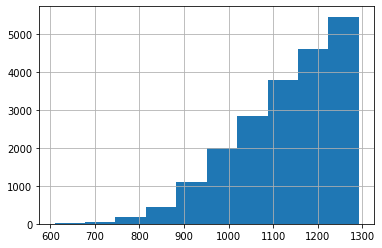

In [209]:
y[y<min_thresh].hist()

In [0]:
#Novice < min_thresh; Master > max_thresh; Amateur otherwise
min_thresh = y.mean()-1*y.std()
max_thresh = y.mean()+1*y.std()
maps = df["AverageElo"].apply(lambda x: )

In [0]:
conditions = [
    (df['AverageElo'] < min_thresh),
    (df['AverageElo'] > min_thresh) & (df['AverageElo'] < max_thresh),
    (df['AverageElo'] > max_thresh)]
choices = ['1', '2', '3']

In [0]:
import numpy as np
ranking = np.select(conditions, choices, default='1')

In [0]:
df["Ranking"] = ranking

In [0]:
df = df.drop(['Amateur', 'Novice', 'Master'], axis=1)

In [237]:
df.head()

,Opening,Total White Score,Total Black Score,No. White Moves,No. Black Moves,White Avg. Score,Black Avg. Score,AverageElo,Rated Blitz game,Rated Bullet game,Rated Classical game,Rated Correspondence game,Rated Rapid game,Rated UltraBullet game,BlackWin,Draw,Ranking
0,Scandinavian Defense,-5112,6476,15,15,-340.80,431.73,1404.0,0,1,0,0,0,0,1,0,2
1,Torre Attack #2,22197,-22367,33,34,672.64,-657.85,1995.0,0,1,0,0,0,0,0,0,3
2,"English Opening: King's English Variation, Thr...",2244,-1124,18,19,124.67,-59.16,2114.0,0,1,0,0,0,0,0,0,3
3,English Opening: Anglo-Indian Defense,12049,-12040,25,26,481.96,-463.08,2069.0,0,1,0,0,0,0,0,0,3
4,Sicilian Defense: French Variation,-2945,4591,23,23,-128.04,199.61,1636.5,0,1,0,0,0,0,1,0,2


In [0]:
X = df.drop(['Opening', 'AverageElo', 'Ranking'], axis=1)

In [0]:
y = df['Ranking']

In [241]:
y.head()

0    2
1    3
2    3
3    3
4    2
Name: Ranking, dtype: object

In [242]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0)
cv_rf_Score = cross_validate(clf, X, y, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [243]:
cv_rf_Score

{'fit_time': array([0.79020786, 0.77973914, 0.74517179]),
 'score_time': array([0.07835531, 0.0772438 , 0.07939863]),
 'test_score': array([0.66136156, 0.66144591, 0.66120884])}